# Data analyse CLL

#### Definitions
CTL = reference simulation without turbines, the control run\
WFP = wind farm parametrization

#### Packages

In [139]:
#Import packages
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import tarfile
import io
import csv
import pandas as pd
# import netCDF4
# import h5netcdf
# import glob

#### Functions

In [140]:
#Function to read (csv) data file
def read_data(filename):
    headers = ['lon','lat','type','r','z']
    df = pd.read_csv(filename,skiprows=1,names= headers,delim_whitespace=True)
    return df

In [141]:
#Function to read (nc) data file
def nc_read(directory):
    data = xr.open_mfdataset(directory)
    return data

In [142]:
#Read data from the coordinates of the wind turbines
turbines = read_data('E:\data\wind_turbine_coordinates_2020_2050.tab')

In [143]:
#Opening the mask, since the mask is saved in a netCDF file
directory_mask = "C:/Users/esmer/OneDrive/TN jaar 3/BEP/mask.nc"
mask = nc_read(directory_mask)

In [144]:
#Opening the mask for wind turbines of type 900 and 901
directory_mask = "C:/Users/esmer/OneDrive/TN jaar 3/BEP/mask_type900901.nc"
mask_type900901 = nc_read(directory_mask)

In [145]:
#Opening the mask for all wind turbines on sea
directory_mask = "C:/Users/esmer/OneDrive/TN jaar 3/BEP/masksea.nc"
mask_sea = nc_read(directory_mask)

#### Determine the different seasons of the CLL: spring, summer, autumn, winter

In [197]:
#The directories for the different seasons
#Spring, summer, autumn, winter
directory1 = ["E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc"]

directory2 = ["E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc"]

# Qualitative approach

## Difference in CLL

#### Determine the minimum and maximum of the difference to find the boundaries of the colorbar

In [147]:
min = []
max = []
for i in range(4):    
    CLLwfp = nc_read(directory1[i])
    CLLctl = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim='time')
    avgCLLctl = CLLctl.mean(dim='time')
    diffCLL = avgCLLwfp - avgCLLctl
    minimum = np.min(diffCLL.cll.values)
    maximum = np.max(diffCLL.cll.values)
    min = np.append(min,minimum)
    max = np.append(max,maximum)
    
print(min)
print(max)

[-0.03587013 -0.04415849 -0.0382393  -0.04180545]
[0.04223487 0.05125049 0.06071281 0.05356121]


In [148]:
min = []
max = []
for i in range(4):    
    CLLwfp = nc_read(directory1[i])
    CLLctl = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim='time')
    avgCLLctl = CLLctl.mean(dim='time')
    diffCLL = avgCLLwfp - avgCLLctl
    minimum = np.min(avgCLLwfp.cll.values)
    maximum = np.max(avgCLLctl.cll.values)
    min = np.append(min,minimum)
    max = np.append(max,maximum)
    
print(min)
print(max)

[0.2776702  0.30070063 0.48658365 0.61938018]
[0.4224827  0.49847358 0.69935882 0.8602435 ]


### For one year (2020)

In [198]:
#Determining the values of CLL for one year instead of seasons
CTL=[]
WFP = []
for i in range(4):
    CTL.append(directory2[i])
    WFP.append(directory1[i])
    
#Extracting the data from CTL into an array cll
ctl = []
wfp = []
_ctl = []
_wfp = []
for i in range(4):
    _ctl.append(nc_read(CTL[i]))
    combined_ctl = xr.concat(_ctl,dim='time')
    _wfp.append(nc_read(WFP[i]))
    combined_wfp = xr.concat(_wfp,dim='time')


# combined_ctl = xr.concat(_ctl,dim='time')
# combined_wfp = xr.concat(_wfp,dim='time')
# #Now WFP gives the data in an xarray for one year
#Now CTL gives the data in an xarray for one year

#### Low cloud cover for year 2020 in CTL

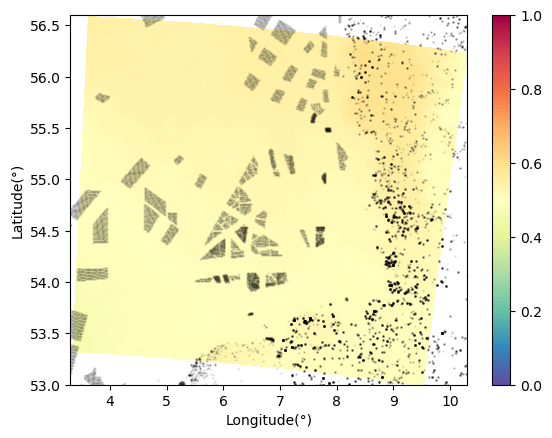

In [150]:
#For loop to plot the difference in CLL with and without wind farms
#plt.figure(dpi=1200)
avgCLLwfp = combined_wfp.mean(dim='time')
avgCLLctl = combined_ctl.mean(dim='time')
diffCLL = avgCLLwfp - avgCLLctl
plt.pcolormesh(avgCLLctl.lon,avgCLLctl.lat,avgCLLctl.cll,cmap='Spectral_r',vmin=0,vmax=1)
plt.colorbar()
plt.scatter(turbines.lon,turbines.lat,s=0.5,c='k',alpha=0.1)
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
# plt.title('The difference of low cloud area fraction')
plt.xlim(3.3,10.3)
plt.ylim(53,56.6)
plt.savefig('clldiff2020.jpg',dpi=300) #save the figure
plt.show()

In [151]:
#The average CLL above wind turbines of type 900 and 901.
mask = avgCLLctl.cll.values*mask_type900901.__xarray_dataarray_variable__.values
sumCLL = np.sum(mask)
sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
avgCLLdiff = sumCLL/sumturbines
avgCLLdiff

0.5164939840128467

In [152]:
#The average CLL in 2020
np.mean(avgCLLctl.cll.values)

0.5216401

#### Difference in cloud cover between WFP and CTL for 2020

AttributeError: 'int' object has no attribute 'lon'

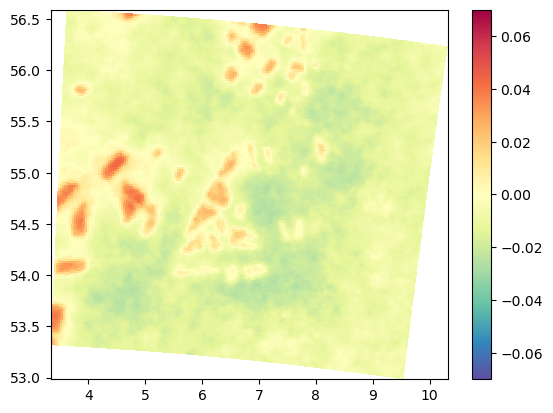

In [199]:
#The difference in CLL with and without wind farms
#plt.figure(dpi=1200)
avgCLLwfp = combined_wfp.mean(dim='time')
avgCLLctl = combined_ctl.mean(dim='time')
diffCLL = avgCLLwfp - avgCLLctl
plt.pcolormesh(diffCLL.lon,diffCLL.lat,diffCLL.cll,cmap='Spectral_r',vmin=-0.07,vmax=0.07)
plt.colorbar()
plt.scatter(turbines.lon,turbines.lat,s=0.5,c='k',alpha=0.1)
plt.xlabel('Longitude(°)')
plt.ylabel('Latitude(°)')
# plt.title('The difference of low cloud area fraction')
plt.xlim(3.3,10.3)
plt.ylim(53,56.6)
plt.savefig('clldiff2020.jpg',dpi=300) #save the figure
plt.show()

In [200]:
#The average difference in CLL above wind turbines of type 900 and 901.
mask = diffCLL.cll.values*mask_type900901.__xarray_dataarray_variable__.values
sumCLL = np.sum(mask)
sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
avgCLLdiff = sumCLL/sumturbines
avgCLLdiff

0.016226198661858867

In [16]:
np.max(diffCLL.cll.values)

0.0440163

### Per season

#### Difference in cloud cover between WFP and CTL per season

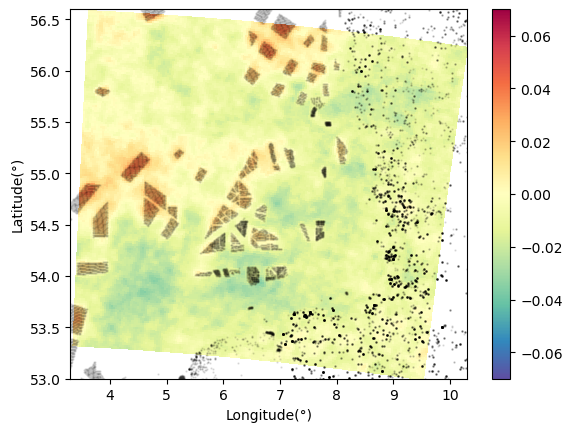

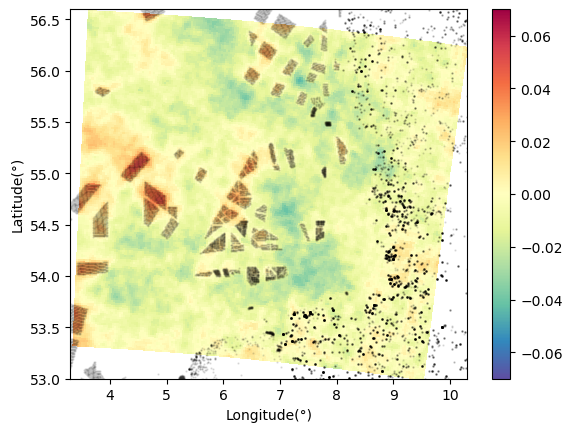

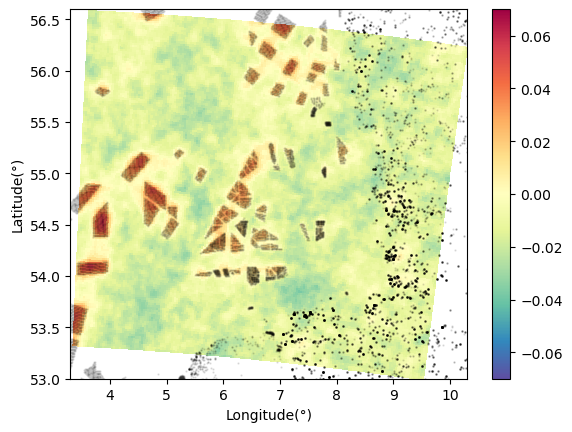

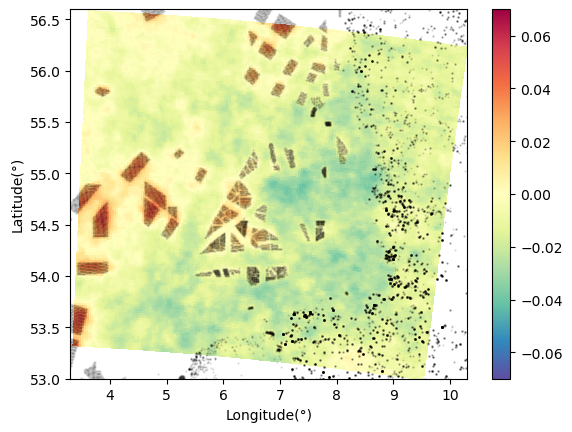

In [21]:
#For loop to plot the difference in CLL with and without wind farms
#plt.figure(dpi=1200)
for i in range(4):
    CLLwfp = nc_read(directory1[i])
    CLLctl = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim='time')
    avgCLLctl = CLLctl.mean(dim='time')
    diffCLL = avgCLLwfp - avgCLLctl
    plt.pcolormesh(diffCLL.lon,diffCLL.lat,diffCLL.cll,cmap='Spectral_r',vmin=-0.07,vmax=0.07)
    plt.colorbar()
    plt.scatter(turbines.lon,turbines.lat,s=0.5,c='k',alpha=0.1)
    plt.xlabel('Longitude(°)')
    plt.ylabel('Latitude(°)')
#     plt.title('The difference of low cloud area fraction')
    plt.xlim(3.3,10.3)
    plt.ylim(53,56.6)
    #plt.savefig('cllSpringdiff.jpg',dpi=300) #save the figure
    plt.show()

## CLL with WFP

In [ ]:
#For loop to plot a figure with WFP
#plt.figure(dpi=1200)
for i in range(4):
    CLLwfp = nc_read(directory1[i])
    CLLref = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim='time')
    avgCLLref = CLLref.mean(dim='time')
    #plt.subplot(2,2,1+i)
    plt.pcolormesh(avgCLLwfp.lon,avgCLLwfp.lat,avgCLLwfp.cll,cmap='Spectral_r',vmin=0,vmax=1)
    plt.colorbar()
    plt.scatter(turbines.lon,turbines.lat,s=0.5,c='k',alpha=0.1)
    plt.xlabel('Longitude(°)')
    plt.ylabel('Latitude(°)')
    plt.title('Low cloud area fraction with WFP')
    plt.xlim(3.3,10.3)
    plt.ylim(53,56.6)
    #plt.savefig('cllSpringdiff.jpg',dpi=300) #save the figure
    plt.show()

## CLL without WFP

#### Over the seasons

In [ ]:
#For loop to plot CLL without WFP
#plt.figure(dpi=1200)
for i in range(4):
    CLLwfp = nc_read(directory1[i])
    CLLref = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim='time')
    avgCLLref = CLLref.mean(dim='time')
    #plt.subplot(2,2,1+i)
    plt.pcolormesh(avgCLLref.lon,avgCLLref.lat,avgCLLref.cll,cmap='Spectral_r',vmin=0,vmax=1)
    plt.colorbar()
    plt.scatter(turbines.lon,turbines.lat,s=0.5,c='k',alpha=0.1)
    plt.xlabel('Longitude(°)')
    plt.ylabel('Latitude(°)')
#     plt.title('Low cloud area fraction without WFP')
    plt.xlim(3.3,10.3)
    plt.ylim(53,56.6)
    #plt.savefig('cllSpringdiff.jpg',dpi=300) #save the figure
    plt.show()
    print(np.mean(avgCLLref.cll.values))

# Quantitative approach

## Using the mask for calculating CLL for wind turbines type 900 and 901

Hierboven hebben we gekeken naar het verschil in low cloud coverage met en zonder windmolens. Dit hebben we kwalitatief gedaan door te plotten hoe de CLL verandert als er wel of geen windmolens staan bij de noordzee. Maar nu willen we er kwantitatief naar kijken. Ik heb een mask met nullen en enen gemaakt en die mask is een 1 als er een windmolen van type 900 en 901 aanwezig is, wat de grootste windmolen is en daarmee ook de grootste impact op het klimaat en specifiek wolkenvorming zal hebben, en een 0 als er geen windmolen van type 901 aanwezig is. 

We gaan nu CLL vermenigvuldigen met de mask. Dat gaan we doen met een zonder windmolens, dus de CTL en de WFP variabele. Hier willen we vervolgens het verschil tussen weten en met dat verschil willen we dat normaliseren door te delen over de som van de windturbines van type 901.

#### Directories CLL for seasons

In [ ]:
#The directories for the different seasons
#Spring, summer, autumn, winter
directory1 = ["E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.2020*.1hr.nc"]

directory2 = ["E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.2020*.1hr.nc"]

#### Kwantitatief verschil in CLL bepalen voor 1 windmolen van type 900 en 901

The difference in CLL above wind turbines of type 900 and 901 between CTL and WFP per season

In [ ]:
#Opening the mask, since the mask is saved in a netCDF file
#Importing the mask of wind turbines 900 and 901
directory_mask = "C:/Users/esmer/OneDrive/TN jaar 3/BEP/mask_type900901.nc"
mask_type900901 = nc_read(directory_mask)

#We gaan voor 4 verschillende seizoenen bepalen wat het gemiddelde verschil in CLL is tussen CTL en WFP
CLL = []
for i in range(4): 
    CLLwfp = nc_read(directory1[i])
    CLLctl = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim="time")
    avgCLLctl = CLLctl.mean(dim="time")
    diffCLL = avgCLLwfp - avgCLLctl
    diff = diffCLL.cll.values*mask_type900901.__xarray_dataarray_variable__.values
    sumCLL = np.sum(diff)
    sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
    avgdiffCLL = sumCLL/sumturbines
    CLL = np.append(CLL,avgdiffCLL)    
print(CLL)

Average values of CLL above wind turbines per season

In [23]:
CLLvalues=[]
for i in range(4):
    CLLctl = nc_read(directory2[i])
    CLLctlmean = CLLctl.mean(dim='time')
    CLLctlmean.cll.load()
    
    maskcllctl = CLLctlmean.cll.values*mask_type900901.__xarray_dataarray_variable__.values
    sumcllmask = np.sum(maskcllctl)
    sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
    valuescll = sumcllmask/sumturbines
    CLLvalues.append(valuescll)

In [24]:
CLLvalues

[0.33584654338800224,
 0.4222939210143059,
 0.6007340553839495,
 0.7101217195486567]

In [ ]:
CTL=[]
WFP = []
for i in range(4):
    CTL.append(directory2[i])
    WFP.append(directory1[i])
    
#Extracting the data from CTL into an array cll
ctl = []
wfp = []
for i in range(4):
    _ctl = []
    _ctl.append(nc_read(CTL[i]))

    
    _wfp = []
    _wfp.append(nc_read(WFP[i]))


combined_ctl = xr.concat(_ctl,dim='time')
combined_wfp = xr.concat(_wfp,dim='time')
# #Now WFP gives the data in an xarray for one year
#Now CTL gives the data in an xarray for one year

In [ ]:
a = combined_wfp.mean(dim = "time") - combined_ctl.mean(dim="time")
mask = a.cll.values*mask_type900901.__xarray_dataarray_variable__.values
sumCLL = np.sum(mask)
sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
avgCLLdiff = sumCLL/sumturbines

avgCLLdiff
np.max(a.cll.values)

In [ ]:
mask = avgCLLctl.cll.values*mask_type900901.__xarray_dataarray_variable__.values
sumCLL = np.sum(mask)
sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
avgCLLdiff = sumCLL/sumturbines

In [ ]:
# avgCLLwfp = combined_wfp.mean(dim='time')
avgCLLctl = _ctl[0].mean(dim="time")
# avgCLLctl = combined_ctl.mean(dim='time')
avgCLLwfp = _wfp[0].mean(dim='time')
diffCLL = avgCLLwfp - avgCLLctl 
diff = diffCLL.cll.values*mask_type900901.__xarray_dataarray_variable__.values
sumCLL = np.sum(diff)
sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
avgdiffCLL = sumCLL/sumturbines
CLL = avgdiffCLL  

CLL

## Calculating total difference in CLL

Now we want to know whether there is a total increase in low cloud coverage or that the distribution of the low clouds changed rather than more CLL.

In [ ]:
CLLavg=[]
for i in range(4):
    CLLwfp = nc_read(directory1[i])
    CLLctl = nc_read(directory2[i])
    avgCLLwfp = CLLwfp.mean(dim='time')
    avgCLLctl = CLLctl.mean(dim='time')
    diffCLL = avgCLLwfp - avgCLLctl
    sumcll = np.sum(diffCLL.cll.values) #Sum of the low cloud area fraction between wfp and ctl
    gridpoints = np.ones([146,166]) #The amount of grid points
    sumgridpoints = np.sum(gridpoints)
    avgcll = sumcll/sumgridpoints
    CLLavg = np.append(CLLavg,avgcll)
print(CLLavg)

In [ ]:
np.mean(CLLavg)

In [ ]:
CLL = []
for i in range(366):
    diffcll = dayswfp[i] - days[i]
    diff = diffcll.cll.values*mask_type900901.__xarray_dataarray_variable__.values
    sumCLL = np.sum(diff)
    sumturbines = np.sum(mask_type900901.__xarray_dataarray_variable__.values)
    avgdiffCLL = sumCLL/sumturbines
    CLL = np.append(CLL,avgdiffCLL) 

np.mean(CLL)

# Analysis of bins of CLL

#### CTL

In [155]:
directory = ["E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202001*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202002*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202003*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202004*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202005*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202006*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202007*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202008*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202009*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202010*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202011*.1hr.nc",
             "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterCTL/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_CTL_ptA.202012*.1hr.nc"
            ]

#### WFP

In [156]:
directorywfp = ["E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202001*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202002*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202003*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202004*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSpringWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202005*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202006*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202007*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLSummerWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202008*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202009*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202010*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLFallWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202011*.1hr.nc",
                "E:/data/transfer_1722109_files_fe942ebb/CLL/CLLWinterWFP/cll.his.GERMAN_BIGHT.WINS50_43h21_fERA5_WFP_2050_ptA.202012*.1hr.nc",
               ]

### CTL: calculation CLL above all wind turbines (900 and 901) and all days in 2020

In [157]:
#Array for different months
#Without WFP
CTL = []
for i in range(12):
    CTL.append(directory[i])

In [95]:
#Extracting the data from CTL into an array cll
cll = []
for i in range(12):
    _ctl = []
    _ctl.append(nc_read(CTL[i]))
    combined_ctl = xr.concat(_ctl,dim='time')
    cll.append(combined_ctl)

In [159]:
#Average over all hours in one day
days = []
dayssel=[]
months = [32,30,32,31,32,31,32,32,31,32,31,32]
j=0
for i in range(12): 
    for j in range(1,months[i]): #All days in year 2020
        dayssel = cll[i].isel(time=(cll[i].time.dt.day == j)) #Selecting the days
        daycll = dayssel.mean(dim='time') #Calculating the mean CLL over that day
        days.append(daycll)
    j+=1

In [160]:
#Loading CLL data for all days
for i in range(len(days)):
    days[i].cll.load()

In [161]:
indices = np.where(mask_type900901.__xarray_dataarray_variable__.values == 1) 

In [162]:
cllvaluesctl=[]
for i in range(366):
    clldayctl=[]
    for j in range(1570):
        clldayctl.append(days[i].cll.values[indices[0][j],indices[1][j]])
    cllvaluesctl.append(clldayctl)

In [163]:
pd.DataFrame(cllvaluesctl)

,0,1,2,3,4,5,6,7,8,9,...,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569
0,0.633420,0.632137,0.639258,0.639092,0.652338,0.645187,0.646972,0.657926,0.646590,0.648778,...,0.859204,0.857244,0.849788,0.839132,0.855527,0.874505,0.893321,0.942987,0.952601,0.959405
1,0.999385,0.999789,0.998432,0.999705,0.999928,0.997586,0.998998,0.999721,0.998965,0.999070,...,0.775369,0.775670,0.775234,0.775251,0.773235,0.772135,0.772103,0.854586,0.855598,0.857030
2,0.635337,0.630052,0.638232,0.634996,0.631796,0.639240,0.643661,0.634738,0.661190,0.662644,...,0.469743,0.473532,0.483955,0.492184,0.501655,0.507040,0.507909,0.495443,0.494453,0.502465
3,0.390539,0.393891,0.395385,0.400686,0.419356,0.403007,0.424485,0.433641,0.425456,0.431588,...,0.459888,0.453150,0.454226,0.454431,0.454893,0.454831,0.465314,0.355693,0.356578,0.325525
4,0.871028,0.866453,0.869450,0.860550,0.853558,0.867657,0.861223,0.850769,0.853349,0.841418,...,0.805385,0.805499,0.808149,0.814927,0.820754,0.821302,0.804157,0.810759,0.795153,0.792242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,0.492781,0.481506,0.493982,0.491841,0.480264,0.495494,0.491703,0.488159,0.500997,0.492452,...,0.575271,0.571455,0.570586,0.562299,0.564516,0.574961,0.577745,0.558082,0.558500,0.555566
362,0.493569,0.491812,0.498280,0.492006,0.494441,0.501406,0.497265,0.497759,0.502837,0.507514,...,0.538127,0.543060,0.560216,0.564173,0.559692,0.547647,0.539983,0.543684,0.536731,0.530477
363,0.537476,0.543313,0.541094,0.542697,0.541994,0.542463,0.539081,0.533257,0.531426,0.523905,...,0.673345,0.673110,0.677551,0.683657,0.691778,0.694971,0.693862,0.680707,0.683062,0.688501
364,0.564809,0.562551,0.568826,0.563760,0.554425,0.569117,0.565480,0.561560,0.568890,0.568063,...,0.663430,0.670054,0.665601,0.667145,0.674005,0.678604,0.677899,0.666244,0.668610,0.667044


In [164]:
#Array to determine the value of CLL for a specific day above the wind turbines
avgcllday = []
for i in range(366):
    cllsum = np.sum(cllvaluesctl[i])
    turbines = 1570
    avgcllday.append(cllsum/turbines)

In [165]:
pd.DataFrame(avgcllday)

,0
0,0.805973
1,0.938875
2,0.604140
3,0.487050
4,0.908789
...,...
361,0.569265
362,0.556146
363,0.627975
364,0.625237


### WFP: calculation CLL above all wind turbines (900 and 901) and all days in 2020

In [166]:
#Array for different months
WFP = []
for i in range(12):
    WFP.append(directorywfp[i])

In [167]:
wfp = []
for i in range(12):
    _wfp = []
    _wfp.append(nc_read(WFP[i]))
    combined_wfp = xr.concat(_wfp,dim='time')
    wfp.append(combined_wfp)

In [168]:
#Average over all hours in one day
dayswfp = []
dayssel=[]
months = [32,30,32,31,32,31,32,32,31,32,31,32]
j=0
for i in range(12): 
    for j in range(1,months[i]): #All days in year 2020
        dayssel = wfp[i].isel(time=(wfp[i].time.dt.day == j)) #Selecting the days
        daywfp = dayssel.mean(dim='time') #Calculating the mean CLL over that day
        dayswfp.append(daywfp)
    j+=1

In [169]:
for i in range(len(dayswfp)):
    dayswfp[i].cll.load()

In [170]:
cllvalueswfp=[]
for i in range(366):
    clldaywfp=[]
    for j in range(1570):
        clldaywfp.append(dayswfp[i].cll.values[indices[0][j],indices[1][j]])
    cllvalueswfp.append(clldaywfp)

In [171]:
#Array to determine the average value of CLL above all wind turbines
avgclldaywfp = []
for i in range(366):
    cllsum = np.sum(cllvalueswfp[i])
    turbines = 1570
    avgclldaywfp.append(cllsum/turbines)

In [172]:
pd.DataFrame(avgclldaywfp)

,0
0,0.790156
1,0.938481
2,0.646167
3,0.516917
4,0.933264
...,...
361,0.589647
362,0.579320
363,0.658083
364,0.647088


### Dividing CLL above wind turbines in bins

In [173]:
#Calculation in which bins the values of CLL for ctl belong and the same values for WFP for that case
cllctl = []
cllwfp = []
bound = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for j in range(366): #All days
    matrixctl = []
    matrixwfp = []
    for k in range(len(bound)-1):
        if bound[k] <= avgcllday[j] < bound[k+1]: #Does cll of ctl of a certain day belong to bound [k,k+1]
            matrixctl.append(avgcllday[j]) #If so, append the value of cll to matrixctl
            matrixwfp.append(avgclldaywfp[j]) #Append the value of the same day in the same bin of wfp
        else:
            matrixctl.append(np.nan)
            matrixwfp.append(np.nan)
    cllctl.append(matrixctl)
    cllwfp.append(matrixwfp)
    
#cllctl is an array containing the values of cll of ctl in the bins
#cllwfp is an array containing the values of cll of wfp in the bins of ctl
#This means you get, for every day, the average value of CLL in a bin. 10 bins and for every day one value of CLL in
# one bin.

In [174]:
#The difference in CLL between wfp and ctl
diffcll = np.subtract(cllwfp,cllctl)

In [175]:
pd.DataFrame(diffcll)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015817,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000395
2,NaN,NaN,NaN,NaN,NaN,NaN,0.042026,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.029867,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024475
...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,0.023174,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,0.030109,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,0.021851,NaN,NaN,NaN


Now we know at a certain day, what bin the value of CLL belongs to and what the difference of that day and that bin is between WFP and CTL. Next, we want to know what the average CLL is over a bin. For this, we need to know the sum of the values of CLL in a bin and the sum of the turbines inside that bin.

In [176]:
pd.DataFrame(diffcll)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015817,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000395
2,NaN,NaN,NaN,NaN,NaN,NaN,0.042026,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.029867,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024475
...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,0.023174,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,0.030109,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,0.021851,NaN,NaN,NaN


In [177]:
#Function to calculate the sum of the turbines
def numberOfNonNans(data):
    count = 0
    for i in data:
        if not np.isnan(i):
            count += 1
    return count 

In [178]:
#Make an array of the sum of the turbines for the different bins
sumturbines=[]
for i in range(10):
    sumturbines.append(numberOfNonNans(diffcll[:,i]))

np.sum(sumturbines)
sumturbines

[0, 2, 5, 44, 112, 127, 35, 20, 13, 8]

Now we want to take the average over the bins.

In [179]:
cllbin=[]
for j in range(10):
    sumdiffcll = np.nansum(diffcll[:,j])
    cllbin.append(sumdiffcll/sumturbines[j])
    
cllbin       

C:\Users\esmer\AppData\Local\Temp\ipykernel_17284\2288851332.py:4: RuntimeWarning: invalid value encountered in double_scalars
  cllbin.append(sumdiffcll/sumturbines[j])


[nan,
 0.0031435000668665336,
 0.00861181174114251,
 0.011999266093772625,
 0.011881283524906342,
 0.01783332750092861,
 0.023350093657586453,
 0.0224204327042695,
 0.014117297070216814,
 0.004336839420780239]

### Seasons

In [180]:
#The difference in CLL between wfp and ctl
diffcll = np.subtract(cllwfp,cllctl)

In [181]:
pd.DataFrame(diffcll)

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015817,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000395
2,NaN,NaN,NaN,NaN,NaN,NaN,0.042026,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.029867,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024475
...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,0.020382,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN,0.023174,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,NaN,NaN,0.030109,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,0.021851,NaN,NaN,NaN


#### Calculation of the different bins and values of CLL

In [182]:
# #Spring
diffspring = diffcll[60:153]

#Make an array of the sum of the turbines for the different bins
sumturbinesspring=[]
for i in range(10):
    sumturbinesspring.append(numberOfNonNans(diffspring[:,i]))

cllbinspring=[]
for j in range(10):
    sumdiffcll = np.nansum(diffspring[:,j])
    if sumdiffcll == 0:
        cllbinspring.append(0)
    else:
        cllbinspring.append(sumdiffcll/sumturbinesspring[j])

# #Summer
diffsummer = diffcll[153:245]

#Make an array of the sum of the turbines for the different bins
sumturbinessummer=[]
for i in range(10):
    sumturbinessummer.append(numberOfNonNans(diffsummer[:,i]))

cllbinsummer=[]
for j in range(10):
    sumdiffcll = np.nansum(diffsummer[:,j])
    if sumdiffcll == 0:
        cllbinsummer.append(0)
    else:
        cllbinsummer.append(sumdiffcll/sumturbinessummer[j])
    
# #autumn
diffautumn = diffcll[245:336]

#Make an array of the sum of the turbines for the different bins
sumturbinesautumn=[]
for i in range(10):
    sumturbinesautumn.append(numberOfNonNans(diffautumn[:,i]))

cllbinautumn=[]
for j in range(10):
    sumdiffcll = np.nansum(diffautumn[:,j])
    if sumdiffcll == 0:
        cllbinautumn.append(0)
    else:
        cllbinautumn.append(sumdiffcll/sumturbinesautumn[j])

#Winter
diffwinter1 = diffcll[:60]
diffwinter2 = diffcll[336:366]
diffwinter1 = pd.DataFrame(diffwinter1)
diffwinter2 = pd.DataFrame(diffwinter2)
diffwinter = diffwinter1.append(diffwinter2)
diffwinter = np.array(diffwinter)

sumturbineswinter=[]
for i in range(10):
    sumturbineswinter.append(numberOfNonNans(diffwinter[:,i]))

cllbinwinter=[]
for j in range(10):
    sumdiffcll = np.nansum(diffwinter[:,j])
    if sumdiffcll == 0:
        cllbinwinter.append(0)
    else:
        cllbinwinter.append(sumdiffcll/sumturbinesautumn[j])
# diffwinter

C:\Users\esmer\AppData\Local\Temp\ipykernel_17284\3224176679.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  diffwinter = diffwinter1.append(diffwinter2)
C:\Users\esmer\AppData\Local\Temp\ipykernel_17284\3224176679.py:67: RuntimeWarning: divide by zero encountered in double_scalars
  cllbinwinter.append(sumdiffcll/sumturbinesautumn[j])


#### Calculation of frequency and probability

In [183]:
#Function to calculate the sum of the turbines
def numberOfNonNans(data):
    count = 0
    for i in data:
        if not np.isnan(i):
            count += 1
    return count 

In [184]:
#Make an array of the sum of the turbines for the different bins
sumturbines=[]
for i in range(10):
    sumturbines.append(numberOfNonNans(diffcll[:,i]))

np.sum(sumturbines)
sumturbines

[0, 2, 5, 44, 112, 127, 35, 20, 13, 8]

In [185]:
cllbin=[]
for j in range(10):
    sumdiffcll = np.nansum(diffcll[:,j])
    cllbin.append(sumdiffcll/sumturbines[j])
    
cllbin   

C:\Users\esmer\AppData\Local\Temp\ipykernel_17284\411953803.py:4: RuntimeWarning: invalid value encountered in double_scalars
  cllbin.append(sumdiffcll/sumturbines[j])


[nan,
 0.0031435000668665336,
 0.00861181174114251,
 0.011999266093772625,
 0.011881283524906342,
 0.01783332750092861,
 0.023350093657586453,
 0.0224204327042695,
 0.014117297070216814,
 0.004336839420780239]

In [186]:
probspring = np.divide(sumturbinesspring,np.sum(sumturbinesspring))
probsummer = np.divide(sumturbinessummer,np.sum(sumturbinessummer))
probautumn = np.divide(sumturbinesautumn,np.sum(sumturbinesautumn))
probwinter = np.divide(sumturbineswinter,np.sum(sumturbineswinter))

probspring

array([0.        , 0.        , 0.01075269, 0.15053763, 0.20430108,
       0.39784946, 0.1827957 , 0.04301075, 0.01075269, 0.        ])

In [187]:
a=[]
a.append(np.sum(probspring*cllbinspring))
a.append(np.sum(probsummer*cllbinsummer))
a.append(np.sum(probautumn*cllbinautumn))
a.append(np.sum(probwinter*cllbinwinter))

a

C:\Programs\Anaconda3\envs\bep\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[0.016419542630186926, 0.014271469771185267, 0.015364392869924914, nan]

In [188]:
np.max(cllbin)

nan

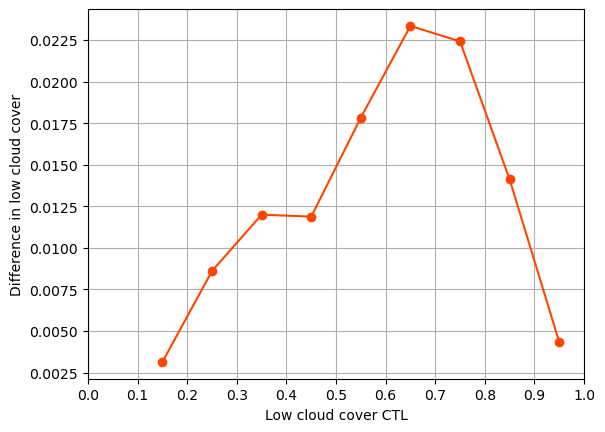

In [189]:
bins = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
plt.plot(bins,cllbin,label="All days",marker='o',color='orangered')
# plt.plot(bins,cllbinspring,label="spring",marker='o',color='darkorange')
# plt.plot(bins,cllbinsummer,label="summer",marker='o',color='gold')
# plt.plot(bins,cllbinautumn,label="autumn",marker='o',color='limegreen')
# plt.plot(bins,cllbinwinter,label="winter",marker='o',color='lightblue')
# plt.xticks(bins,values)
values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# plt.grid(axis='x',linewidth=0.5)
grid_points = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xticks(grid_points)
plt.grid(axis='x')
# plt.yticks([0.0])
plt.grid(axis='y')
# plt.legend()
# plt.title("Difference in cloud cover")
plt.xlabel("Low cloud cover CTL")
plt.ylabel("Difference in low cloud cover")
plt.savefig('differencebinsCLL.jpg',dpi=300) #save the figure
plt.show()

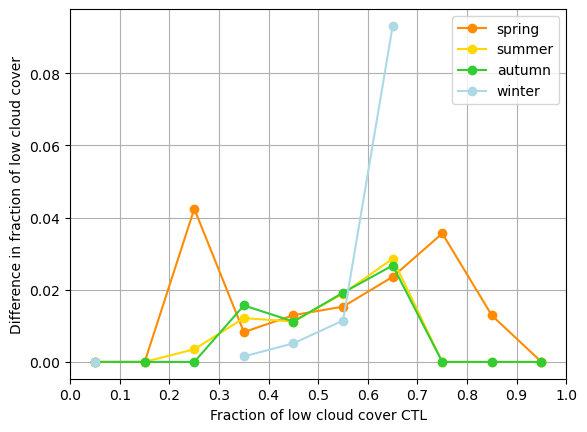

In [190]:
bins = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
# plt.plot(bins,cllbin,label="All days",marker='o',color='orangered')
plt.plot(bins,cllbinspring,label="spring",marker='o',color='darkorange')
plt.plot(bins,cllbinsummer,label="summer",marker='o',color='gold')
plt.plot(bins,cllbinautumn,label="autumn",marker='o',color='limegreen')
plt.plot(bins,cllbinwinter,label="winter",marker='o',color='lightblue')
# plt.xticks(bins,values)
values = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# plt.grid(axis='x',linewidth=0.5)
grid_points = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xticks(grid_points)
plt.grid(axis='x')
# plt.yticks([0.0])
plt.grid(axis='y')
plt.legend()
# plt.title("Difference in cloud cover")
plt.xlabel("Fraction of low cloud cover CTL")
plt.ylabel("Difference in fraction of low cloud cover")
plt.savefig('differencebinsCLL.jpg',dpi=300) #save the figure
plt.show()

### Calculating the frequency and probability of a bin

#### Frequency

In [191]:
frequency = sumturbines

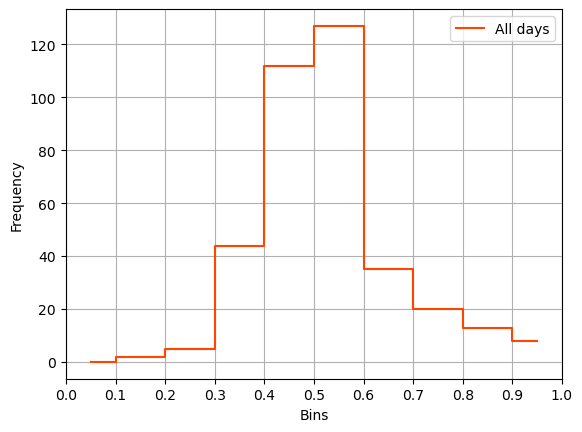

In [192]:
bins = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
plt.plot(bins,frequency,label="All days",color='orangered',drawstyle='steps-mid')
grid_points = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xticks(grid_points)
plt.grid(axis='x')
# plt.yticks([0.0])
plt.grid(axis='y')
plt.xlabel("Bins")
plt.ylabel("Frequency")
# plt.title("The amount of days with average CLL inside bin")
plt.legend()
plt.savefig('HistogramfrequencyCLL.jpg',dpi=300) #save the figure
plt.show()
#The amount of days that the average CLL over all wind turbines of 900 and 901 is inside a bin

#### Probability

In [193]:
prob = np.divide(frequency,366)

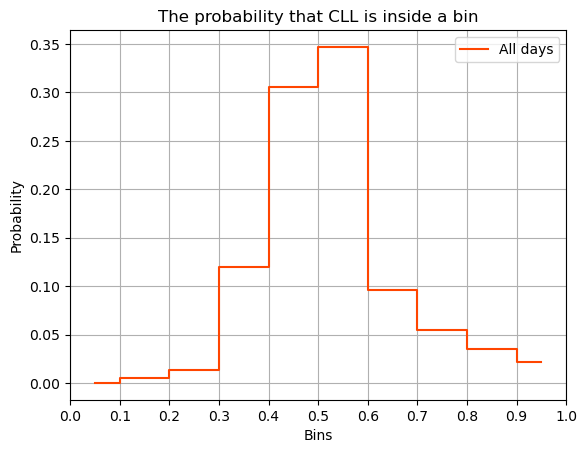

In [194]:
bins = [0.05,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]
plt.plot(bins,prob,label="All days",color='orangered',drawstyle='steps-mid')
# plt.plot(bins,probspring,label="Spring",drawstyle='steps-mid')
# plt.plot(bins,probsummer,label="Summer",drawstyle='steps-mid')
# plt.plot(bins,probautumn,label="Autumn",drawstyle='steps-mid')
# plt.plot(bins,probwinter,label="Winter",drawstyle='steps-mid')
grid_points = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.xticks(grid_points)
plt.grid(axis='x')
# plt.yticks([0.0])
plt.grid(axis='y')
plt.xlabel("Bins")
plt.ylabel("Probability")
plt.legend()
plt.title("The probability that CLL is inside a bin")
plt.savefig('probabilitycllbin.jpg',dpi=300) #save the figure

In [196]:
values = prob * cllbin
values
np.sum(values[1:])

0.015455550884570658